In [11]:
import os
import torch
from matplotlib import pyplot as plt
from diffusion_co_design.wfcrl.schema import ScenarioConfig
from diffusion_co_design.wfcrl.diffusion.generator import (
    Generator,
    OptimizerDetails,
    soft_projection_constraint,
)
from diffusion_co_design.wfcrl.env import render_layout
from diffusion_co_design.wfcrl.diffusion.generate import Generate
from diffusion_co_design.wfcrl.env import _create_designable_windfarm
from diffusion_co_design.common import OUTPUT_DIR, get_latest_model

SCENARIO = "wfcrl_rect_8"
scenario = ScenarioConfig.from_file(f"conf/{SCENARIO}.yaml")


In [ ]:
pretrain_dir = os.path.join(OUTPUT_DIR, "wfcrl", "diffusion", SCENARIO)
latest_checkpoint = get_latest_model(pretrain_dir, "model")

generator = Generator(
    generator_model_path=latest_checkpoint, scenario=scenario, batch_size=9
)

operation = OptimizerDetails()
operation.projection_constraint = soft_projection_constraint(scenario)
operation.num_recurrences = 2
operation.backward_steps = 0


class PlaceholderValueFn(torch.nn.Module):
    def forward(self, x):
        return x.flatten(start_dim=1).sum(dim=1)


placeholder_value_fn = PlaceholderValueFn()

batch = generator.generate_batch(
    batch_size=9,
    value=placeholder_value_fn,
    use_operation=True,
    operation_override=operation,
)

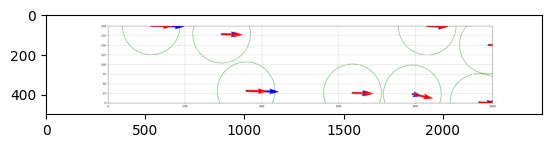

In [22]:
x = batch[1]
env = _create_designable_windfarm(
    scenario=scenario,
    initial_xcoords=x[:, 0].tolist(),
    initial_ycoords=x[:, 1].tolist(),
    render=True,
)

env.reset()
plt.imshow(env.render())

In [23]:
x

array([[359.30618  ,  31.561249 ],
       [830.39795  , 199.74854  ],
       [965.0663   ,   1.4342964],
       [112.38405  , 200.32668  ],
       [295.54425  , 178.91345  ],
       [636.0139   ,  26.220947 ],
       [989.42957  , 150.78586  ],
       [791.75604  ,  23.457735 ]], dtype=float32)